### Explicit computation of $\Sigma(W^{1,1},g_{t_0,t_1})$
Each eigenvalue is generated by an $U(2)^{\bullet}$-spherical representation $\varrho(z_1,z_2,z_3)$:
- $\text{Max}\_z_{i}$ regulates the highest possible value of $z_i$
- The function $p(a_1,a_2):=\wp(a_1,a_2)$ denotes the partition function
- The function $m(z_1,z_2,z_3)=[\varrho(z_1,z_2,z_3)\restriction U^{\bullet}(2): 1_{U^{\bullet}(2)}]$ computes the dimension of $V_{\varrho(z_1,z_2,z_3)}^{U^{\bullet}(2)}$
- The function $\text{mult}(z_1,z_2,z_3)=\dim(V_{\varrho(z_1,z_2,z_3)})\dim(V_{\varrho(z_1,z_2,z_3)}^{U^{\bullet}(2)})$ computes the dimension of the eigenspace corresponding to $\varrho(z_1,z_2,z_3)$
- The corresponding eigenvalue is denoted by $\eta(z_1, z_2, z_3, t_0, t_1)$
- Deleting the symbol # of #results.sort(key=lambda x: x[3]) results in listing the eigenvalues by size. This is only possible if explicit values for $t_0,t_1$ are chosen
- After the long list of eigenvalues, we plot the corresponding graphs

In [2]:

import numpy as np
import sympy as sp
import math

t1,t0, α, δ =sp.symbols('t1 t0 α δ', positive=True)
#t0=t1=2 #is the case computed by Urakawa.
#t0=1/2 #is the case of the canonical variation see Nagy and Semmelmann
#t0=1/(2*α*δ)
#t1=1/(δ**2)
max_z1=20
max_z2=20
max_z3=20

def p(a1, a2):
    if a1 % 3 != 0:
        return 0
    count = 0
    for m1 in range(0, (a1 // 3) + 1):
        m3 = a2 + m1 + 2 * ((a1 - 3 * m1) // 3)
        if m3 >= 0:
            count += 1
    return count

def m(z1,z2,z3):    
    return p(z1+z2,-z3-(z1+2)) + p(z1-2*z2-3,(z2+1)-z3) +p((z2-2*z1-6),-z3+(-z2+z1+1)) - p(z1+z2,-z3-(z2+1)) - p(z1-2*z2-3,(z2-1-z1)-z3) -p((z2-2*z1-6),(z1+2-z3)) - p(z1+z2,z3-(z1+1)) - p(z1-2*z2-3,z2+2+z3) -p((z2-2*z1-6),((z1-z2)+2+z3)) + p(z1+z2,z3-z2) + p(z1-2*z2-3,(z2-z1)+z3) + p((z2-2*z1-6),(z1+3+z3))
def mult(z1,z2,z3): 
    return (m(z1,z2,z3))*(z1-z2+1)*(z1+2)*(z2+1)*(2*z3+1)/2   #This and the formula for eigenvalues agree with Urakawa for z3=0 and t0=t1.

def η(z1, z2, z3, t0, t1): #computation of the eigenvalue
        return  4 * (z1**2 + z2**2 - z1 * (z2 - 3)) / (3 * t0) -4*(z3**2 + z3) / t0 +4*(z3**2 + z3) /  t1 
    
results = [] #creating the set of eigenvalues
for z1 in range(0, max_z1):
    for z2 in range(0, max_z2):
        for z3 in range(0, max_z3):
            m_value = m(z1, z2, z3)
            if m_value > 0 and z1>=z2:       
                η_value = η(z1, z2, z3,t0,t1)
                results.append((z1, z2, z3,  η_value,mult(z1,z2,z3)))
                
#results.sort(key=lambda x: x[3]) # Sort list by size of η. ATTENTION: This is not possible if symbolic computations are done.
print("{:<20} {:<30} {:<20}".format("(z1, z2, z3)", "η(z1,z2,z3,t0,t1)", "mult(z1,z2,z3)"))

# Print the eigenvalues
for result in results:
    z_values = f"({result[0]}, {result[1]}, {result[2]})"
    eta_value = str(result[3])  
    mult_value = str(result[4]) 
    print("{:<20} {:<30} {:<20}".format(z_values, eta_value, mult_value))


(z1, z2, z3)         η(z1,z2,z3,t0,t1)              mult(z1,z2,z3)      
(0, 0, 0)            0                              1.0                 
(2, 1, 0)            12/t0                          8.0                 
(2, 1, 1)            8/t1 + 4/t0                    24.0                
(3, 0, 1)            8/t1 + 16/t0                   30.0                
(3, 3, 1)            8/t1 + 16/t0                   30.0                
(4, 2, 0)            32/t0                          27.0                
(4, 2, 1)            8/t1 + 24/t0                   81.0                
(4, 2, 2)            24/t1 + 8/t0                   135.0               
(5, 1, 1)            8/t1 + 40/t0                   105.0               
(5, 1, 2)            24/t1 + 24/t0                  175.0               
(5, 4, 1)            8/t1 + 40/t0                   105.0               
(5, 4, 2)            24/t1 + 24/t0                  175.0               
(6, 0, 2)            24/t1 + 48/t0                 

### Plots of $\Sigma(W^{1,1},g_{t_0,t_1})$ 
- a) plot with $t_0=0.5$ and $t_1$ is variable  
- b) plot with constant volume, i.e. $t_1=t_0^{-3/4}$
- c) plot with $t_0=0.5$ and $t_1$ is variable; each eigenvalue is devided by the total curvature. Note that the scalar curvature vanishes for $t_1=4.12$

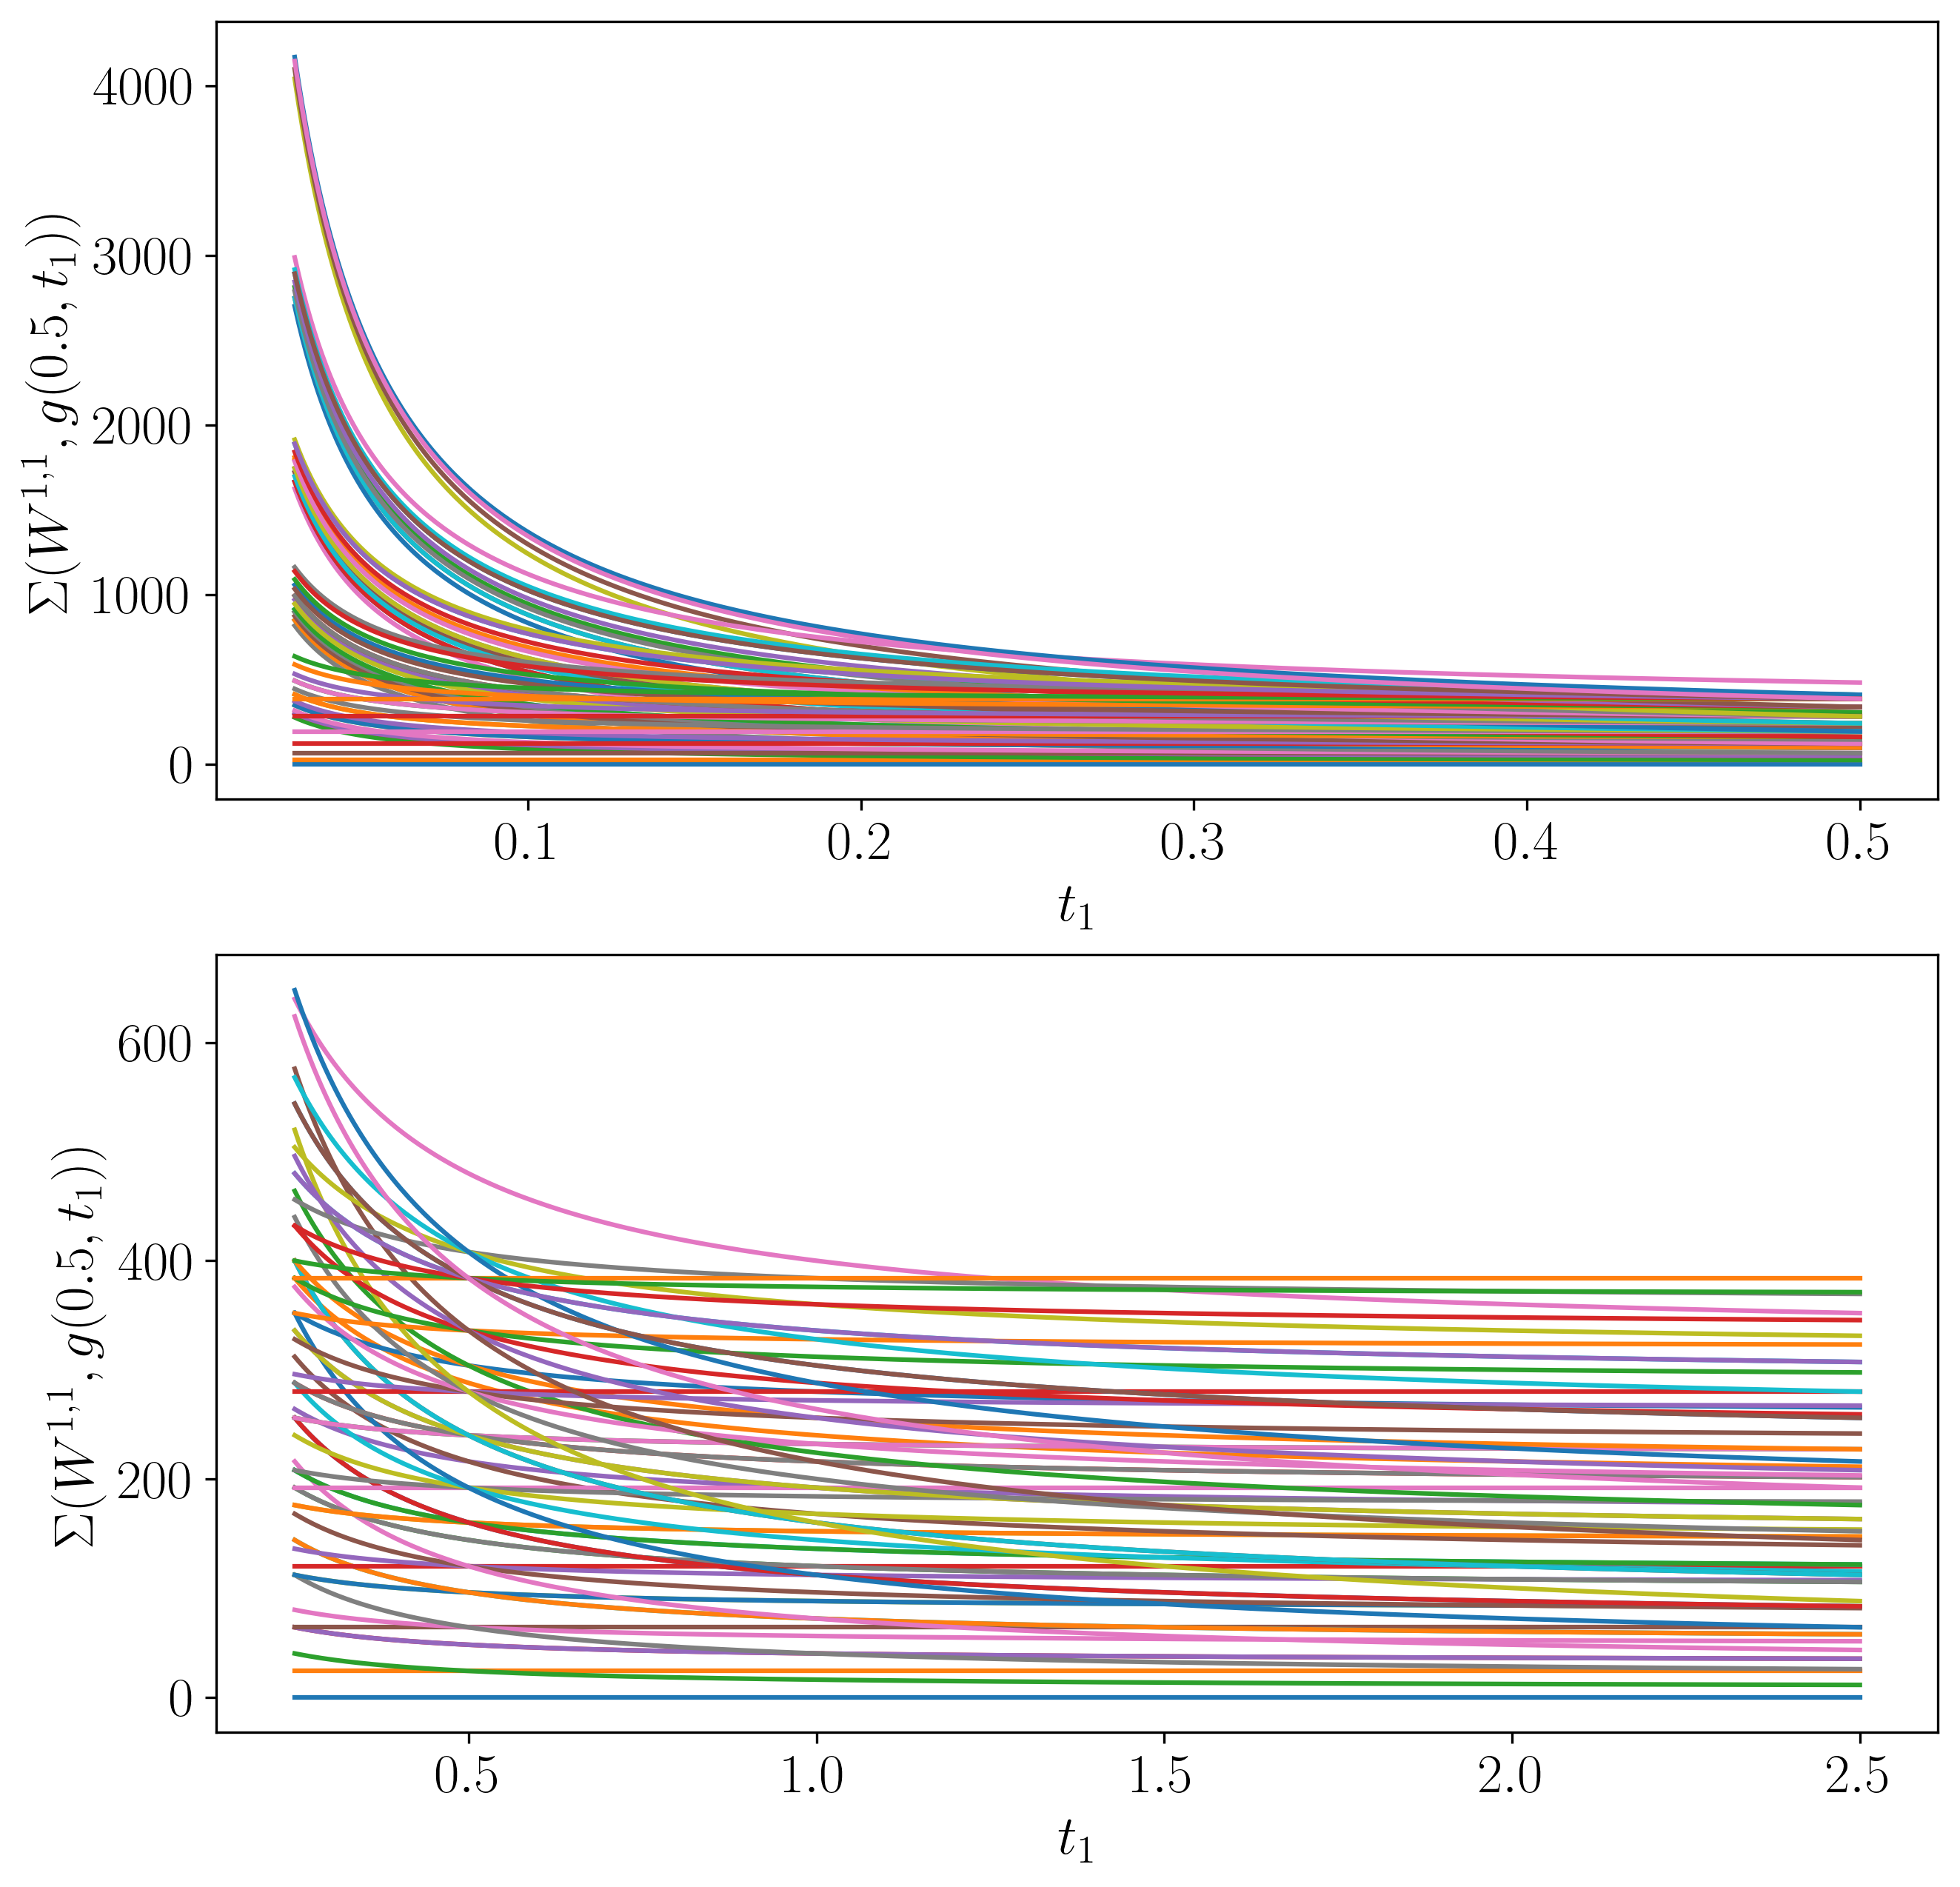

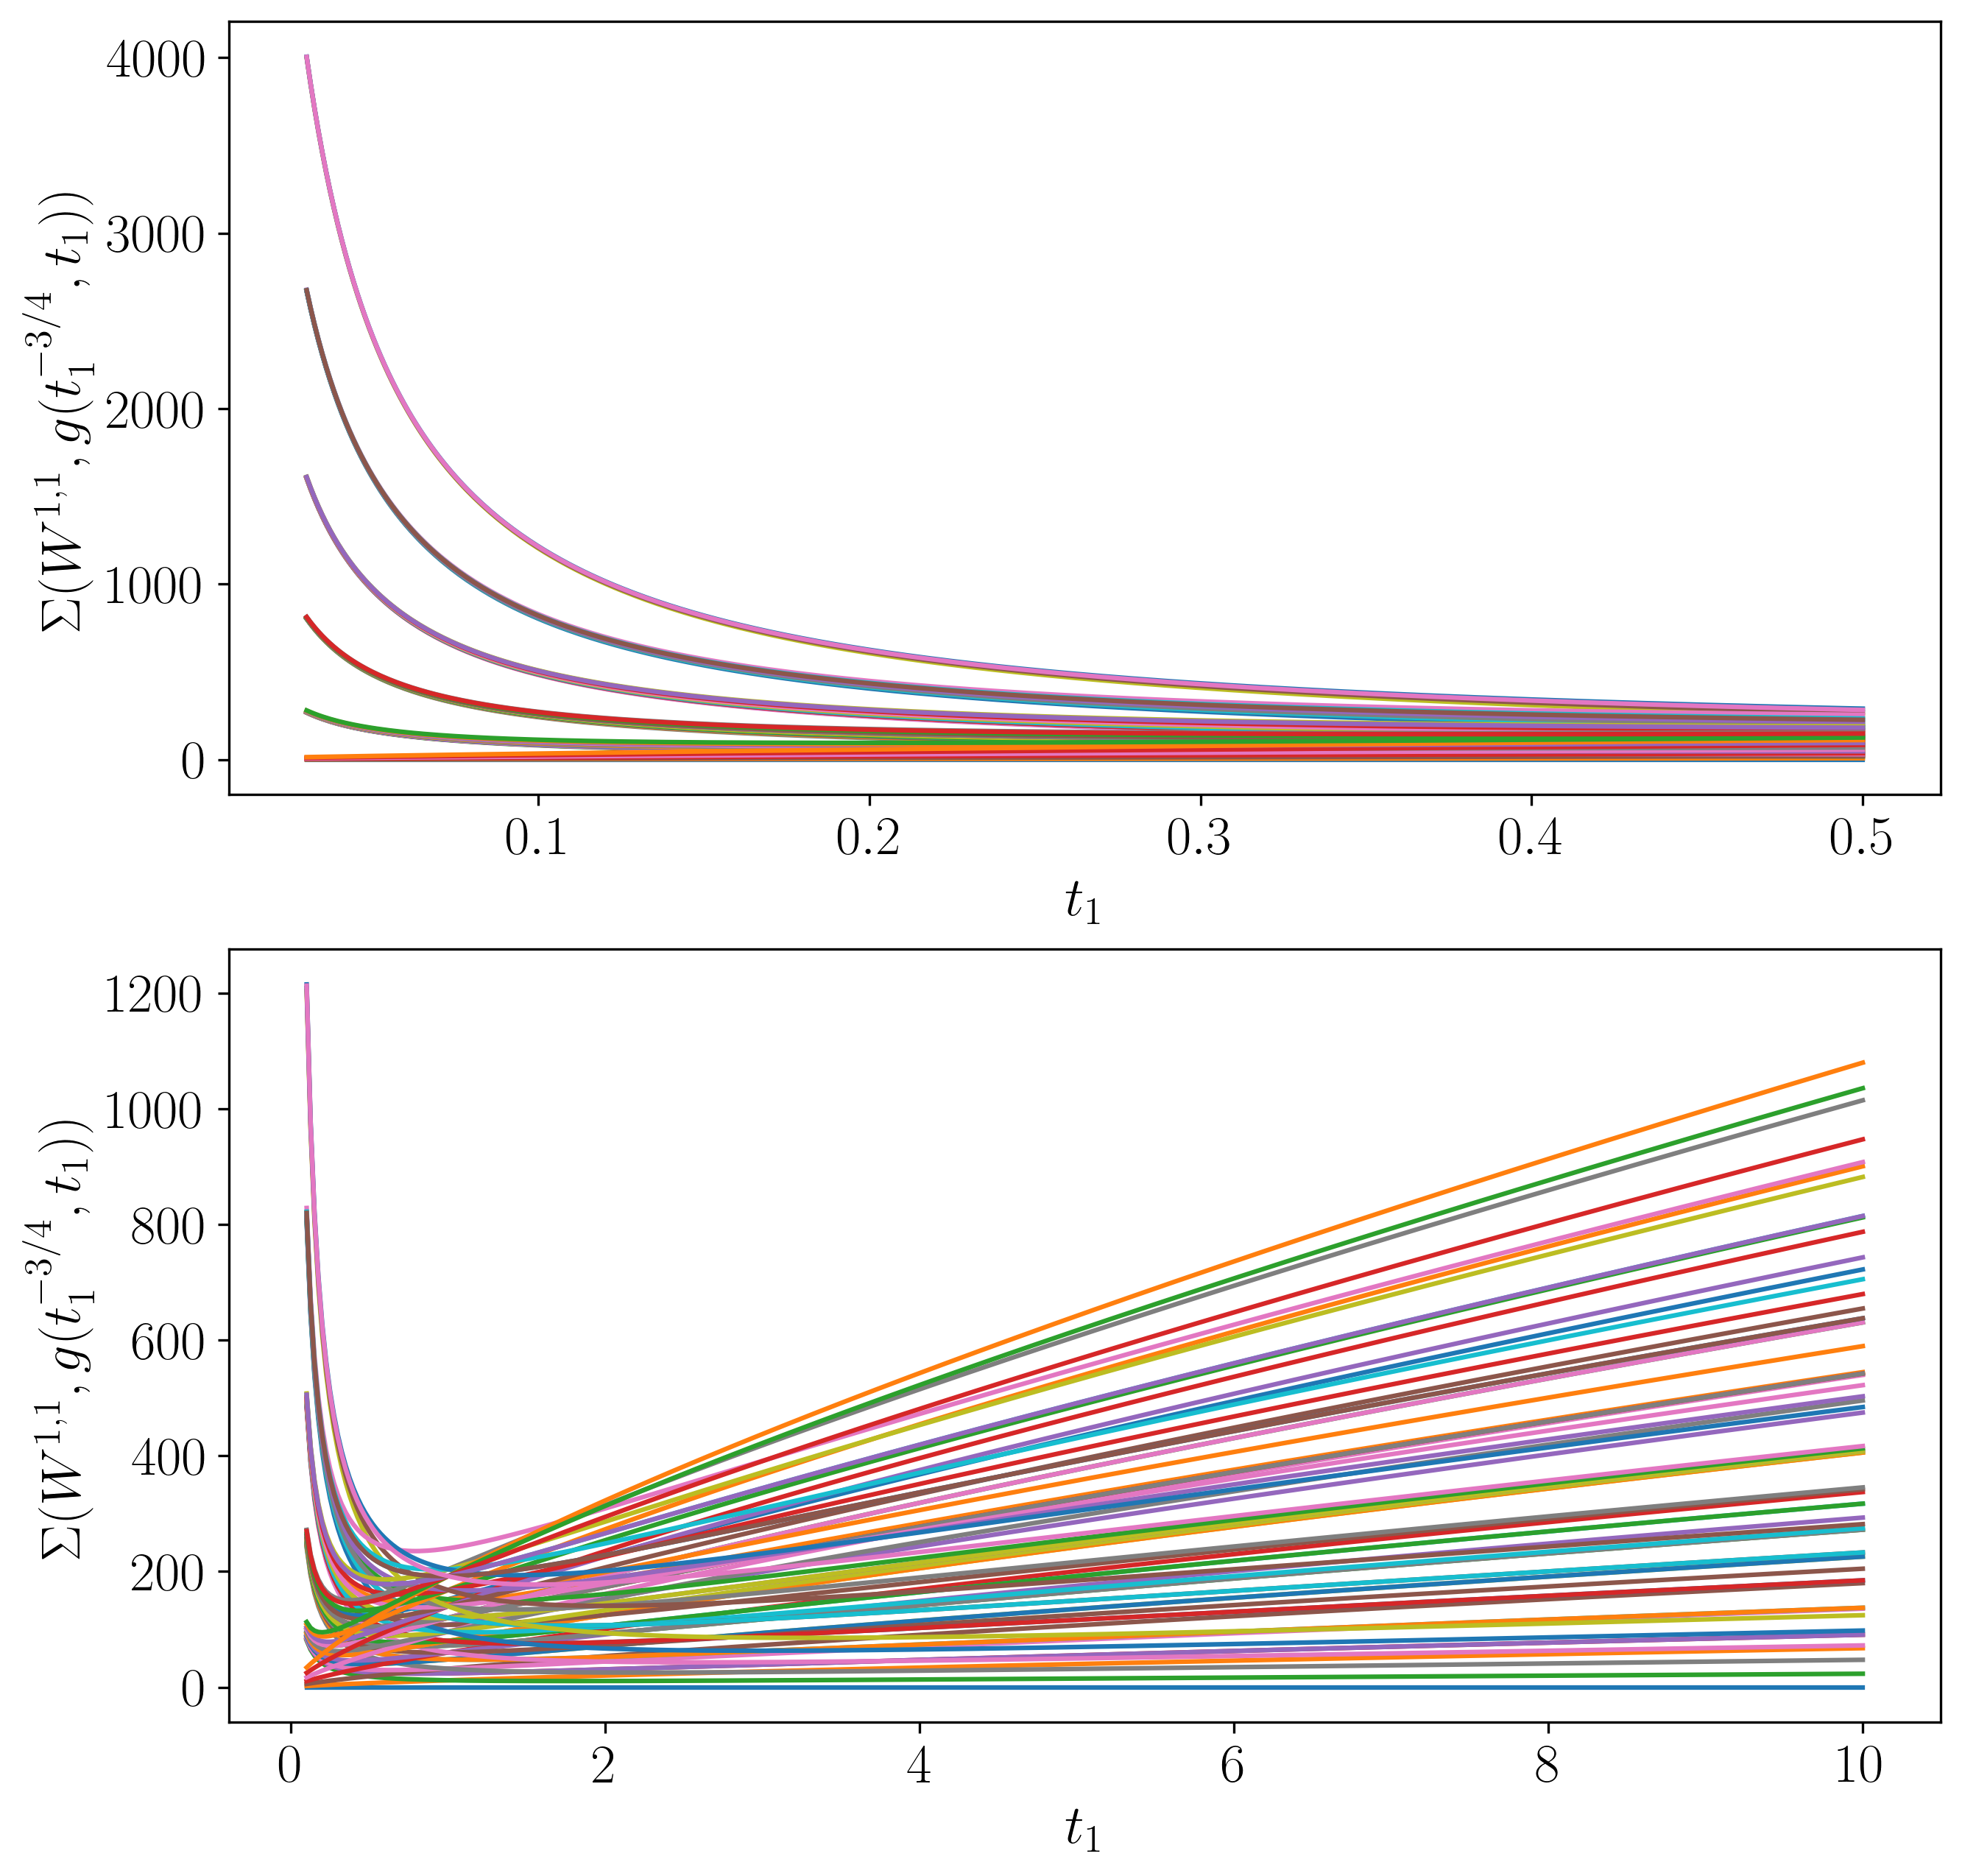

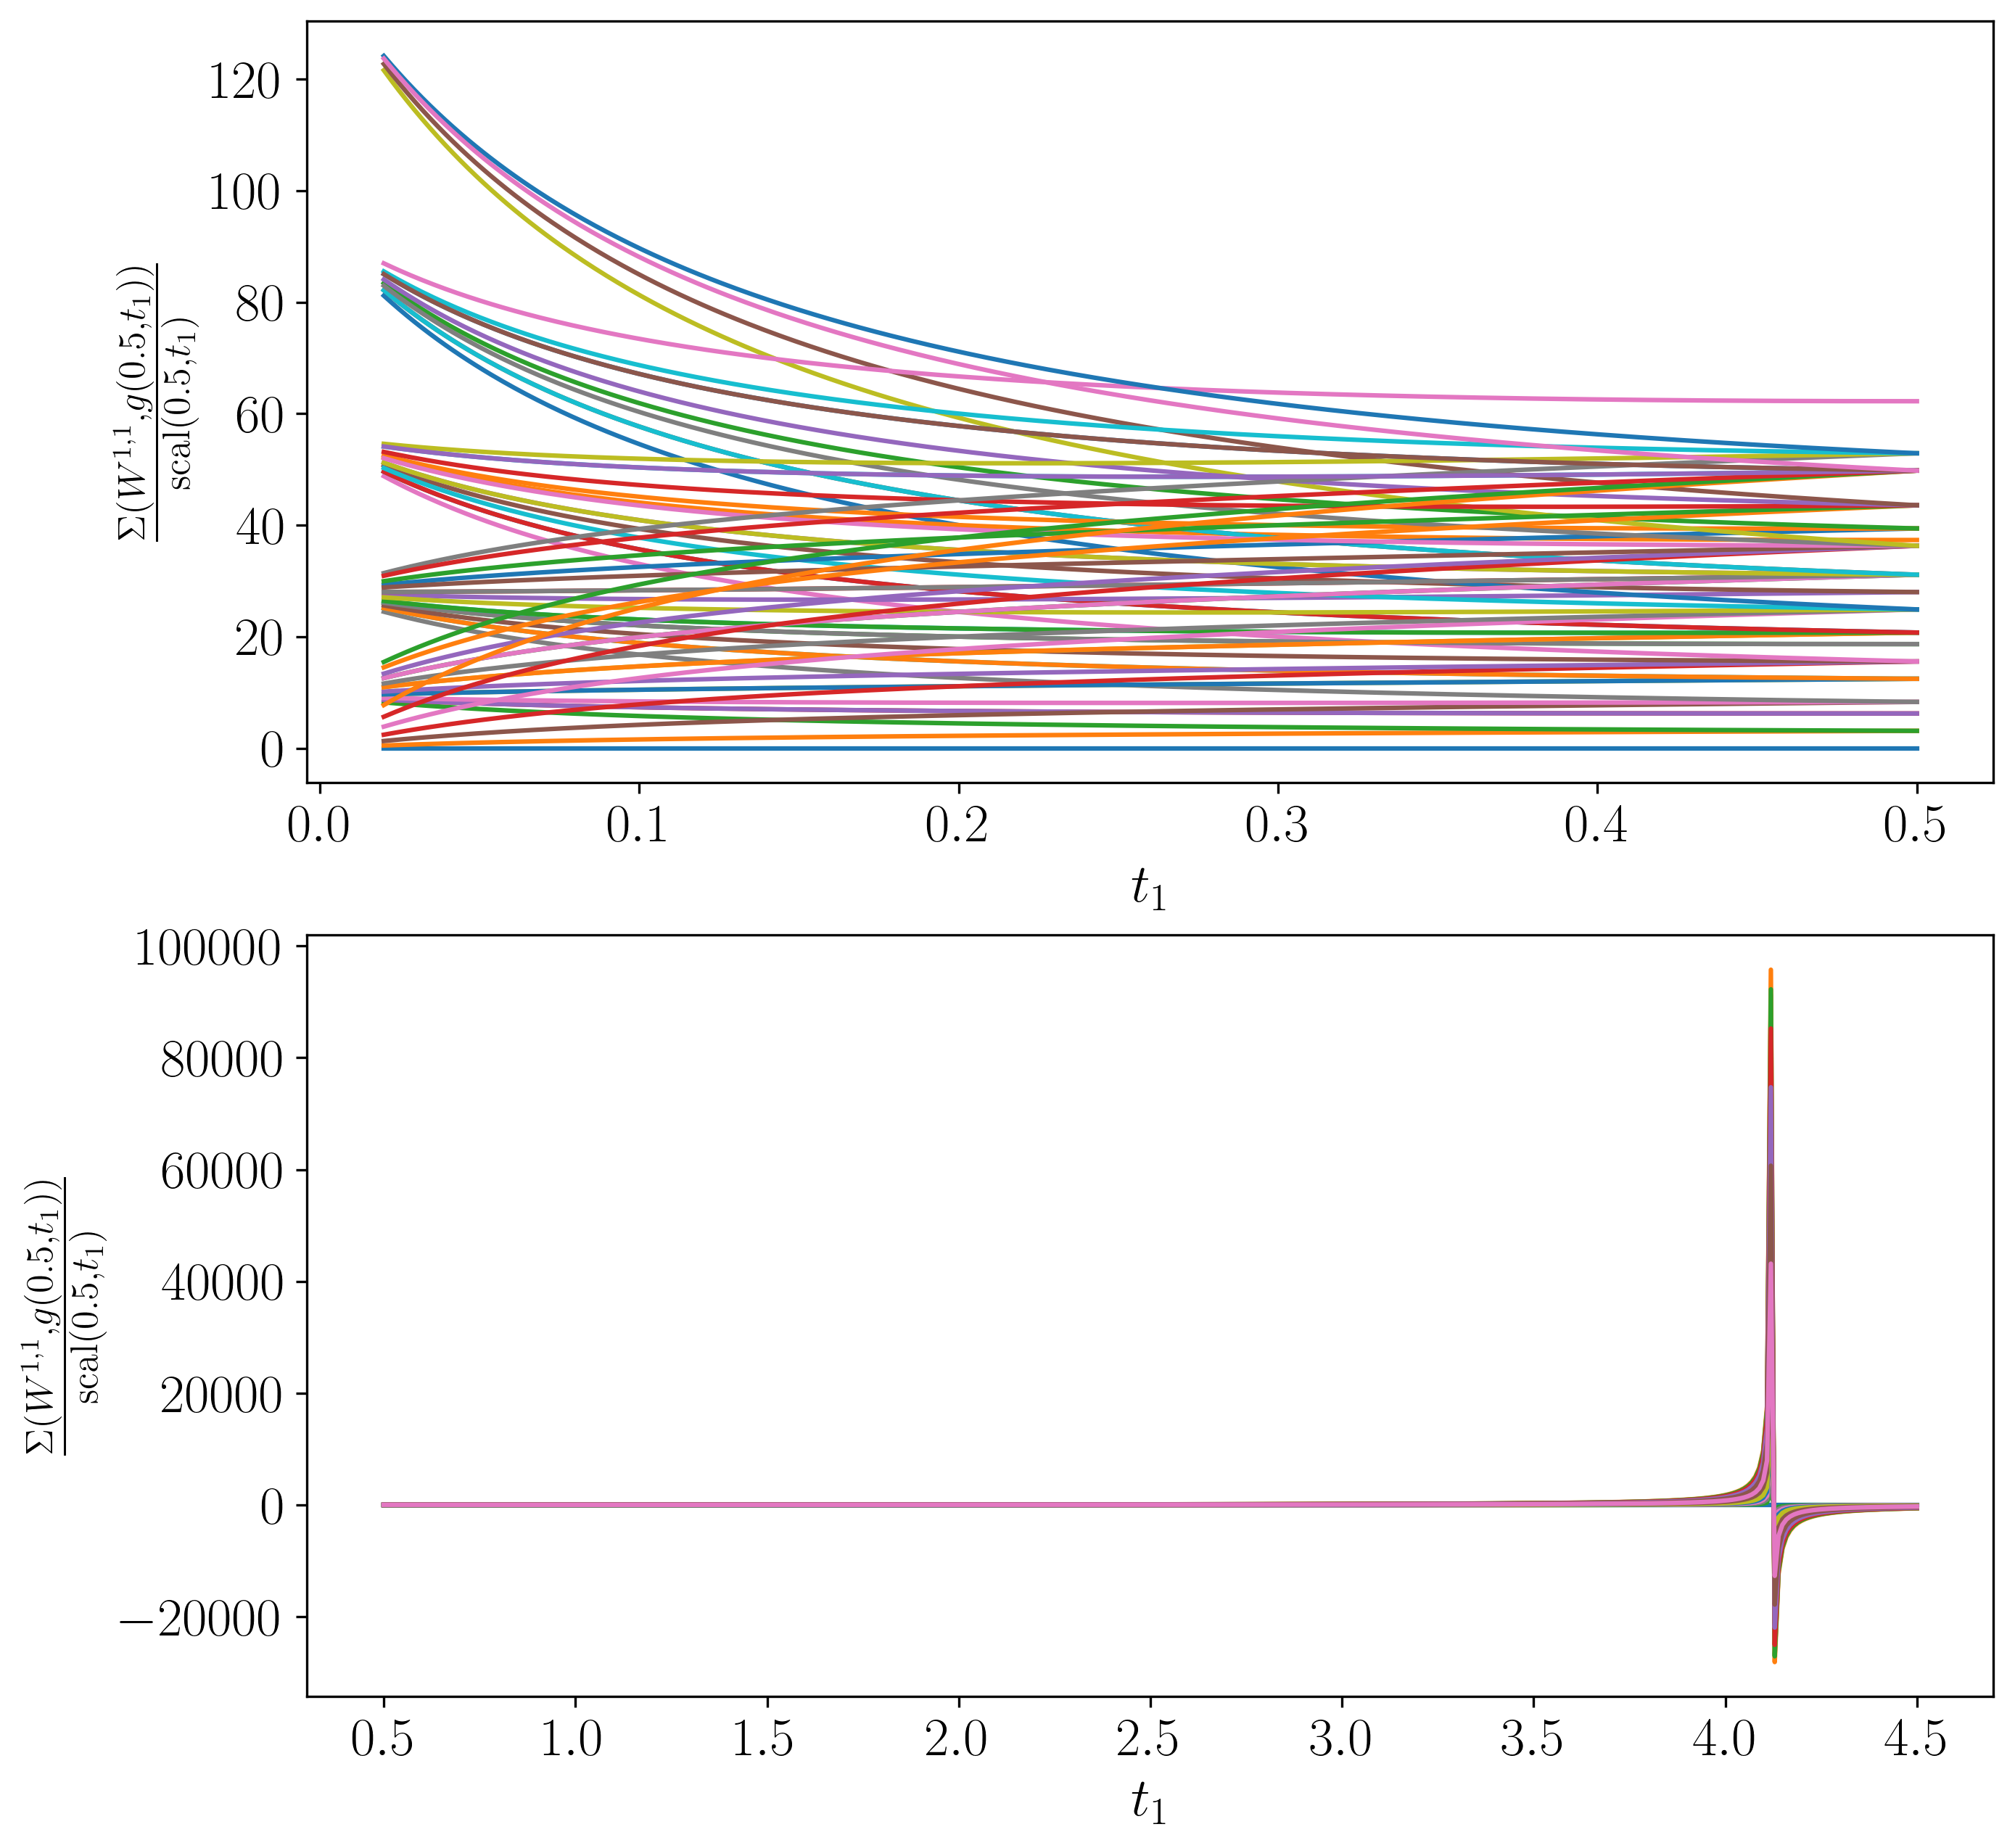

In [1]:
# =============================================================================
# PLOT OF THE EIGENVALUES / SCALAR CURVATURE WITH RESPECT TO t1 WHERE t0 = 0.5 FIXED
# =============================================================================
import numpy as np
import matplotlib.pyplot as plt
max_z1=13
max_z2=7
max_z3=6
#------------------------------------------------------------------------------
#Adapt the labeling of the axis to the latex format (only for optical reasons)
# Enable LaTeX for text handling
plt.rcParams["text.usetex"] = True
# Set the font size
plt.rcParams['font.size'] = 18
# Set the font family to serif to resemble LaTeX default
plt.rcParams['font.family'] = 'serif'
#------------------------------------------------------------------------------

def p(a1, a2): #computation of the partition function
    if a1 % 3 != 0:
        return 0

    count = 0
    for m1 in range(0, (a1 // 3) + 1):
        m3 = a2 + m1 + 2 * ((a1 - 3 * m1) // 3)
        if m3 >= 0:
            count += 1
    return count

def m(z1,z2,z3):    #if m(z1,z2,z3)>0 (z1,z2,z3) defines a  spherical representation
    return p(z1+z2,-z3-(z1+2)) + p(z1-2*z2-3,(z2+1)-z3) +p((z2-2*z1-6),-z3+(-z2+z1+1)) - p(z1+z2,-z3-(z2+1)) - p(z1-2*z2-3,(z2-1-z1)-z3) -p((z2-2*z1-6),(z1+2-z3)) - p(z1+z2,z3-(z1+1)) - p(z1-2*z2-3,z2+2+z3) -p((z2-2*z1-6),((z1-z2)+2+z3)) + p(z1+z2,z3-z2) + p(z1-2*z2-3,(z2-z1)+z3) + p((z2-2*z1-6),(z1+3+z3))
# Save the parameters (z1,z2,z3) which are going to define functions in a list:
#ACHTUNG DAS MUSS NOCH ANGEPASST WERDEN; LETZTE ZAHL IST DANN NICHT MEHR IMMER GERADE!!!
funcs = [] #creating the set of eigenvalues
for z1 in range(0, max_z1):
    for z2 in range(0, max_z2):
        for z3 in range(0, max_z3):
            m_value = m(z1, z2, z3)
            if m_value > 0 and z1>=z2:        #if (z1,z2,z3) is a spherical representation (i.e. m(z1,z2,z3)>0) this gives an eigenvalue
                funcs.append((z1, z2, z3))

t0=r1=0.5

#we plot the eigenvalues with respect to t1<2, t0=2 is fixed.
def η(z1,z2,z3,t1,t0):
    return (4* (z3**2 + z3) * (1/t1 - 1/t0) + 4 * (z1**2 + z2**2 - z1 * (z2 - 3)) / (3 * t0)) #r1=(t1*t0)/(4*(t0-t1)) has been substituted
#scalar curvature
def scal(t1,t0):
    return 0.428571428571429*t1/t0**2 + 4*(-1.5*t1 + 6.0*t0)/(7*t0**2) + 0.857142857142857/t1

#a) unmodified eigenvalues
t1_values1a = np.linspace(0.03, 0.5, 400)  #400 values between 0.08 and 0.2
t1_values2a = np.linspace(0.25, 2.5, 400)     #400 values between 0.6 and 2

#b) eigenvalues, vol is constant
t1_values1b = np.linspace(0.03, 0.5, 400)  #400 values between 0.08 and 0.2
t1_values2b = np.linspace(0.1, 10, 400)     #400 values between 0.6 and 2

#c) eigenvalues/scalarcurvature
t1_values1c = np.linspace(0.02, 0.5, 400)  #400 values between 0.08 and 0.2
t1_values2c = np.linspace(0.5, 4.5, 400)     #400 values between 0.6 and 2



#----------------------------------------------------------------------------------------------
#a) Plot η(z1,z2,z3, t1_values1)
fig, (ax2,ax1) = plt.subplots(2, 1, figsize=(10,10),dpi=300)  # Change the size of the diagrams
for a in funcs:
    z1,z2,z3=a
    ax1.plot(t1_values2a, η(z1,z2,z3, t1_values2a,t0)) #functions for the second graph, domain between 0.8 and 2
for a in funcs:
    z1,z2,z3 = a 
    ax2.plot(t1_values1a, η(z1,z2,z3, t1_values1a,t0))   #functions for the first graph domain between 0.08 and 0.2


# Add label to x-axis
ax1.set_ylabel(r"$\Sigma(W^{1,1},g(0.5,t_{1}))$")
ax1.set_xlabel(r"$t_{1}$")
ax2.set_ylabel(r"$\Sigma(W^{1,1},g(0.5,t_{1}))$")
ax2.set_xlabel(r"$t_{1}$")

fig.savefig("eigenvalues_unmodified.png", bbox_inches='tight', dpi=200)

#----------------------------------------------------------------------------------------------

#b) Plot η(z1,z2,z3, t1_values1) where vol=const
fig, (ax2,ax1) = plt.subplots(2, 1, figsize=(10,10),dpi=300)  # Change the size of the diagrams
for a in funcs:
    z1,z2,z3=a
    ax1.plot(t1_values2b, η(z1,z2,z3, t1_values2b,t1_values2b**(-3/4))) #functions for the second graph, domain between 0.8 and 2
for a in funcs:
    z1,z2,z3 = a 
    ax2.plot(t1_values1b, η(z1,z2,z3, t1_values1b,t1_values1b**(-3/4)))                  #functions for the first graph domain between 0.08 and 0.2


# Add label to x-axis
ax1.set_ylabel(r"$\Sigma(W^{1,1},g(t_{1}^{-3/4},t_{1}))$")
ax1.set_xlabel(r"$t_{1}$")
ax2.set_ylabel(r"$\Sigma(W^{1,1},g(t_{1}^{-3/4},t_{1}))$")
ax2.set_xlabel(r"$t_{1}$")

fig.savefig("eigenvalues_vol_const.png", bbox_inches='tight', dpi=300)

#----------------------------------------------------------------------------------------------

#c) Plot η(z1,z2,z3, t1_values1)/scal(t1_values1,t0)
fig, (ax2,ax1) = plt.subplots(2, 1, figsize=(10,10),dpi=300)  # Change the size of the diagrams
for a in funcs:
    z1,z2,z3=a
    ax1.plot(t1_values2c, η(z1,z2,z3, t1_values2c,t0)/scal(t1_values2c,t0)) #functions for the second graph, domain between 0.8 and 2
for a in funcs:
    z1,z2,z3 = a 
    ax2.plot(t1_values1c, η(z1,z2,z3, t1_values1c,t0)/scal(t1_values1c,t0))                  #functions for the first graph domain between 0.08 and 0.2


# Add label to x-axis
ax1.set_ylabel(r"$\frac{\Sigma(W^{1,1},g(0.5,t_{1}))}{\mathrm{scal}(0.5,t_1)}$")
ax1.set_xlabel(r"$t_{1}$")
ax2.set_ylabel(r"$\frac{\Sigma(W^{1,1},g(0.5,t_{1}))}{\mathrm{scal}(0.5,t_1)}$")
ax2.set_xlabel(r"$t_{1}$")

#----------------------------------------------------------------------------------------------

fig.savefig("eigenvalues_total_curvature.png", bbox_inches='tight', dpi=300)   #saves the plots
plt.show()

### Consistency check
We verify that the sum of the multiplicities over all $U^{\bullet}(2)$-spherical representations  $\varrho(z_1,z_2,z_3)$ where $(z_1,z_2)$ is fixed, yields precisely the multiplicity $\text{mult}(z_1,z_2)$ computed by Urakawa.   

In [3]:
# ================================ Our results ================================

def p(a1, a2): #computation of the partition function
    if a1 % 3 != 0:
        return 0

    count = 0
    for m1 in range(0, (a1 // 3) + 1):
        m3 = a2 + m1 + 2 * ((a1 - 3 * m1) // 3)
        if m3 >= 0:
            count += 1
    return count

def m(z1, z2, z3):  # Computation if (z1,z2,z3) is a spherical representation and how often the trivial rep occurs
    return p(z1+z2,-z3-(z1+2)) + p(z1-2*z2-3,(z2+1)-z3) +p((z2-2*z1-6),-z3+(-z2+z1+1)) - p(z1+z2,-z3-(z2+1)) - p(z1-2*z2-3,(z2-1-z1)-z3) -p((z2-2*z1-6),(z1+2-z3)) - p(z1+z2,z3-(z1+1)) - p(z1-2*z2-3,z2+2+z3) -p((z2-2*z1-6),((z1-z2)+2+z3)) + p(z1+z2,z3-z2) + p(z1-2*z2-3,(z2-z1)+z3) + p((z2-2*z1-6),(z1+3+z3))

def mult(z1, z2, z3):  # Computation of the multiplicites of each representation
    return (m(z1,z2,z3))*(z1-z2+1)*(z1+2)*(z2+1)*(2*z3+1)/2

#Computing the rest in a loop:

max_range = 80  # Adjust this value depending on your computational resources

grouped_results_first_method = {} #this is a dictronary where the key is supposed to be (z1,z2) and the value is m(z1,z2,z3)
for z1 in range(0, max_range):
    for z2 in range(0, max_range):
        for z3 in range(0, max_range):
            m_value = m(z1, z2, z3)
            if m_value > 0 and z1 >= z2: #this is precisely the case if we have a U(2)-spherical representation
                mult_value = mult(z1, z2, z3) 
                key = (z1, z2) #we want to add up the multiplicites of two representations with the same z1, z2 value
                if key not in grouped_results_first_method:
                    grouped_results_first_method[key] = 0
                grouped_results_first_method[key] += mult_value #here we change the value of the key (z1,z2) the mult_value.

# ================================ Results of Urakawa ================================
#here we use the same code again as we do not need to add up any multiplicities.
from sympy import symbols

k, l = symbols('k l', integer=True)
k = 1
l = 1

def d(z1, z2):
    return (z1 - z2 + 1) * (z1 + 2) * (z2 + 1) / 2

results_second_method = set()

for n_1 in range(0, max_range): 
    for n_2 in range(0, max_range):
        count = 0
        for P in range(n_1 + 1):
            for q in range(n_2 + 1):
                for r in range(P + n_2 - q + 1):
                    if k * n_1 - l * n_2 - (2 * k + l) * P + (l - k) * q + (k + 2 * l) * r == 0:
                        count += 1
        if count > 0:
            z1 = n_1 + n_2
            z2 = n_2
            mult_value = d(z1, z2) * count
            results_second_method.add((z1, z2, mult_value))

grouped_results_second_method = {(z1, z2): mult for z1, z2, mult in results_second_method} #here we construct a second dictionary with the results of Urakawa: (z1,z2) are the keys, the multiplicites are the values.

# ================================ Comparison of the multiplicites ================================

comparison_results = {}

for key in grouped_results_first_method: 
    value_from_first_method = grouped_results_first_method[key]
    
    #for each key of the first method (our method) we search for the key of the second method (Urakawas method) and compare their values
    if key in grouped_results_second_method:
        value_from_second_method = grouped_results_second_method[key]
        values_match = value_from_first_method == value_from_second_method #the key becomes a key of the new dictionary and its values are the values of the first dic, the second dic and the last one checks if both coincide.
    else: #if we can not find the key of the first method in the second method
        value_from_second_method = None
        values_match = False

    comparison_results[key] = (value_from_first_method, value_from_second_method, values_match)

# Sort so that "False" entries are displayed first

sorted_comparison = sorted(comparison_results.items(), key=lambda x: x[1][2]) # When sorting based on boolean values using the 'sorted' function, items with the value 'False' (which corresponds to 0) come before items with the value 'True' (which corresponds to 1).

# Output the sorted results
for key, value in sorted_comparison:
    print(key, ":", value)


(0, 0) : (1.0, 1.0, True)
(2, 1) : (32.0, 32.0, True)
(3, 0) : (30.0, 30.0, True)
(3, 3) : (30.0, 30.0, True)
(4, 2) : (243.0, 243.0, True)
(5, 1) : (280.0, 280.0, True)
(5, 4) : (280.0, 280.0, True)
(6, 0) : (140.0, 140.0, True)
(6, 3) : (1024.0, 1024.0, True)
(6, 6) : (140.0, 140.0, True)
(7, 2) : (1215.0, 1215.0, True)
(7, 5) : (1215.0, 1215.0, True)
(8, 1) : (960.0, 960.0, True)
(8, 4) : (3125.0, 3125.0, True)
(8, 7) : (960.0, 960.0, True)
(9, 0) : (385.0, 385.0, True)
(9, 3) : (3696.0, 3696.0, True)
(9, 6) : (3696.0, 3696.0, True)
(9, 9) : (385.0, 385.0, True)
(10, 2) : (3402.0, 3402.0, True)
(10, 5) : (7776.0, 7776.0, True)
(10, 8) : (3402.0, 3402.0, True)
(11, 1) : (2288.0, 2288.0, True)
(11, 4) : (9100.0, 9100.0, True)
(11, 7) : (9100.0, 9100.0, True)
(11, 10) : (2288.0, 2288.0, True)
(12, 0) : (819.0, 819.0, True)
(12, 3) : (8960.0, 8960.0, True)
(12, 6) : (16807.0, 16807.0, True)
(12, 9) : (8960.0, 8960.0, True)
(12, 12) : (819.0, 819.0, True)
(13, 2) : (7290.0, 7290.0, True)